<a href="https://colab.research.google.com/github/Pardhu156/Image-Generation-Using-Text-by-Multimodal-GAN/blob/main/Multimodal_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries and Models

In [ ]:
!git clone https://github.com/openai/CLIP.git
!git clone https://github.com/CompVis/taming-transformers

fatal: destination path 'CLIP' already exists and is not an empty directory.
fatal: destination path 'taming-transformers' already exists and is not an empty directory.


In [ ]:
!pip uninstall torch torchvision -y #Uninstall current versions
!pip install numpy==1.23.5 #Make sure numpy is installed
!pip install torch torchvision #Reinstall PyTorch and torchvision

  Using cached torch-2.7.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.wh

In [ ]:
!pip install tensorboard==2.10.1 torch torchvision taming-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 37.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-dataproc 5.18.1 requires protobuf!=4.21.0,!=4.21.1,!=4.2

In [ ]:
!pip install --no-deps fifty regex tqdm
!pip install omegaconf==2.0.0 pytorch-lightning==1.0.8
!pip uninstall torchtext --yes
!pip install einops
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: omegaconf
    Found existing installation: omegaconf 2.3.0
    Uninstalling omegaconf-2.3.0:
      Successfully uninstalled omegaconf-2.3.0
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.5.1.post0
    Uninstalling pytorch-lightning-2.5.1.post0:
      Successfully uninstalled pytorch-lightning-2.5.1.post0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
import torch,os,imageio,pdb,math
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import PIL
import matplotlib.pyplot as plt
import yaml
from omegaconf import OmegaConf
from CLIP import clip

##Functions and Parameters

In [ ]:
def show_from_tensor(tensor):
  img=tensor.clone()
  img=img.mul(255).byte()
  img=img.cpu().numpy().transpose((1,2,0))
  plt.figure(figsize=(10,7))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

def norm_data(data):
  return (data.clip(-1,1)+1)/2   #in range of (0,1)

In [ ]:
learning_rate=0.5
batch_size=1
wd=0.1   #Used by optimiser internally to generalise by clipping weghts
noise_factor=0.1
total_itr=500
im_shape=[225,400,3]   #h*w*ch (shape of image generated)
size_1,size_2,channels=im_shape

##CLIP

In [ ]:
clipmodel,_=clip.load('ViT-B/32',jit=False)
clipmodel.eval()
print(clip.available_models())   #All the architectures present in CLIP
print("CLIP model visual input resolution:", clipmodel.visual.input_resolution)  #Max input pixels of CLIP
device=torch.device("cuda:0")
torch.cuda.empty_cache()

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 235MiB/s]


['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
CLIP model visual input resolution: 224


##Taming Transformer

#Download Taming Transformer

In [ ]:
%cd taming-transformers/

/content/taming-transformers


In [ ]:
!mkdir -p models/vqgan_imagenet_f16_16384/checkpoints
!mkdir -p models/vqgan_imagenet_f16_16384/configs
if len(os.listdir('models/vqgan_imagenet_f16_16384/checkpoints/'))==0:
   !wget 'https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1' -O 'models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt'
   !wget 'https://heibox.uni-heidelberg.de/f/274fb24ed38341bfa753/?dl=1' -O 'models/vqgan_imagenet_f16_16384/configs/model.yaml'

--2025-04-29 06:49:11--  https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/128d57d3-ad5b-4c4f-a982-664ad6f7a0e3/last.ckpt [following]
--2025-04-29 06:49:12--  https://heibox.uni-heidelberg.de/seafhttp/files/128d57d3-ad5b-4c4f-a982-664ad6f7a0e3/last.ckpt
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 980092370 (935M) [application/octet-stream]
Saving to: ‘models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt’

models/vqgan_imagen 100%[===================>] 934.69M  7.53MB/s    in 2m 8s   

2025-04-29 06:51:21 (7.28 MB/s) - ‘models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt’ saved [980092370/980092370]

--2025-04-29 06:51:2

#Load and Create functions

In [ ]:
from taming.models.vqgan import VQModel

def load_config(config_path,display=False):
  config_data=OmegaConf.load(config_path)
  if display:
    print(yaml.dump(OmegaConf.to_container(config_data)))
  return config_data

def load_vqgan(config,ckt_path=None):
  model=VQModel(**config.model.params)
  if ckt_path is not None:
    state_dict=torch.load(ckt_path,map_location="cpu",weights_only=False)["state_dict"]
    missing,unexpected=model.load_state_dict(state_dict,strict=False)
  return model.eval()

def generator(x):
  x=taming_model.post_quant_conv(x)
  x=taming_model.decoder(x)
  return x

taming_config=load_config("./models/vqgan_imagenet_f16_16384/configs/model.yaml",display=True)
taming_model=load_vqgan(taming_config,ckt_path="./models/vqgan_imagenet_f16_16384/checkpoints/last.ckpt").to(device)

model:
  base_learning_rate: 4.5e-06
  params:
    ddconfig:
      attn_resolutions:
      - 16
      ch: 128
      ch_mult:
      - 1
      - 1
      - 2
      - 2
      - 4
      double_z: false
      dropout: 0.0
      in_channels: 3
      num_res_blocks: 2
      out_ch: 3
      resolution: 256
      z_channels: 256
    embed_dim: 256
    lossconfig:
      params:
        codebook_weight: 1.0
        disc_conditional: false
        disc_in_channels: 3
        disc_num_layers: 2
        disc_start: 0
        disc_weight: 0.75
      target: taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminator
    monitor: val/rec_loss
    n_embed: 16384
  target: taming.models.vqgan.VQModel

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:04<00:00, 134MB/s]


8.19kB [00:00, 519kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


##Initialising Parameters to be Optimized

In [ ]:
class Parameters(torch.nn.Module):
  def __init__(self):
    super(Parameters,self).__init__()
    self.data=0.5*torch.randn(batch_size,256,size_1//16,size_2//16).cuda()   #1*256*14*25(VQGAN works on patches of 16 and on 256 channels)
    self.data=torch.nn.Parameter(torch.sin(self.data))   #adds periodic nature to data

  def forward(self):
    return self.data

def init_params():
  Params=Parameters().cuda()
  optimizer=torch.optim.AdamW([{'params':[Params.data],'lr': learning_rate}],weight_decay=wd)
  return Params,optimizer

#Encoding Prompts by CLIP

torch.Size([1, 256, 14, 25])
image dimensions: torch.Size([1, 3, 224, 400])


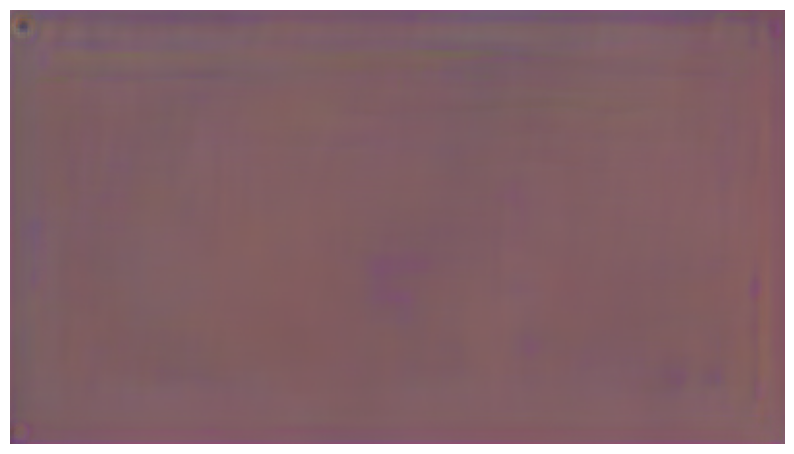

In [ ]:
normalize=torchvision.transforms.Normalize((0.48145466,0.4578275,0.40821073),(0.26862954,0.26130258,0.27577711))

def encodeText(text):
  t=clip.tokenize(text).cuda()
  t=clipmodel.encode_text(t).detach().clone()
  return t

def createEncoding(include,exclude,extra):
  include_enc=[]
  for text in include:
    include_enc.append(encodeText(text))
  exclude_enc=encodeText(exclude) if exclude !=' ' else 0
  extra_enc=encodeText(extra) if exclude !=' ' else 0
  return include_enc,exclude_enc,extra_enc

#Testing of Generator
params,optim=init_params()
with torch.no_grad():
  print(params().shape)   #1*256*14*25
  img=norm_data(generator(params()).cpu())
  print("image dimensions:",img.shape)   #1*3*224*500
  show_from_tensor(img[0])

#Creating Transformation and Crops

In [ ]:
augTransform=torch.nn.Sequential(
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomAffine(30,(0.2,0.2),fill=0)
).cuda()

# def create_crops(img,num_crops=30):
#   p=size_1//2   #112
#   img=torch.nn.functional.pad(img,(p,p,p,p),mode='constant',value=0)   #Output is 1*3*448*624 as padding on both sides so 112+112
#   img=augTransform(img)
#   crop_set=[]
#   for ch in range(num_crops):
#     gap_1=int(torch.normal(1.0,0.5,()).clip(0.2,1.5)*size_1)
#     gap_2=int(torch.normal(1.0,0.5,()).clip(0.2,1.5)*size_1)
#     offsetx=torch.randint(0, int(size_1*2-gap_1),())
#     offsety=torch.randint(0, int(size_1*2-gap_1),())
#     crop=img[ : , : ,offsetx:offsetx+gap_2,offsety:offsety+gap_2]   #bs*ch*h*w
#     crop=torch.nn.functional.interpolate(crop,(224,224),mode='bilinear',align_corners=True)   #as CLIP input is 224
#     crop_set.append(crop)
#   img_crop=torch.cat(crop_set,0)   #30*3*224*224
#   img_crop=img_crop+noise_factor*torch.rand_like(img_crop,requires_grad=False)   #adding some noise to image
#   return img_crop


###STFUMATO EFFECT###   Only good for painting kind of generations

def create_crops(img, num_crops=32):
  p=size_1//2
  img = torch.nn.functional.pad(img, (p,p,p,p), mode='constant', value=0) # 1 x 3 x 448 x 624 (adding 112*2 on all sides to 224x400)

  img = augTransform(img) #RandomHorizontalFlip and RandomAffine

  crop_set = []
  for ch in range(num_crops):
    gap1= int(torch.normal(1.2, .3, ()).clip(.43, 1.9) * size_1)
    offsetx = torch.randint(0, int(size_1*2-gap1),())
    offsety = torch.randint(0, int(size_1*2-gap1),())

    crop=img[:,:,offsetx:offsetx+gap1, offsety:offsety+gap1]

    crop = torch.nn.functional.interpolate(crop,(224,224), mode='bilinear', align_corners=True)
    crop_set.append(crop)

  img_crops=torch.cat(crop_set,0) ## 30 x 3 x 224 x 224

  randnormal = torch.randn_like(img_crops, requires_grad=False)
  num_rands=2
  randstotal=torch.rand((img_crops.shape[0],1,1,1)).cuda() #32

  for ns in range(num_rands):
    randstotal*=torch.rand((img_crops.shape[0],1,1,1)).cuda()

  img_crops = img_crops + noise_factor*randstotal*randnormal

  return img_crops

##Show Function

In [ ]:
def show(Params,show_crop):
  with torch.no_grad():
    generated_img=generator(Params())   #1*3*224*400
    if(show_crop):
      print("Augumented Crop Image")
      aug_gen=generated_img.float()   #1*3*224*400
      aug_gen=create_crops(aug_gen)
      aug_gen_norm=norm_data(aug_gen[0])
      show_from_tensor(aug_gen_norm)

    print("Generated Image(not cropped)")
    generated_img_norm=norm_data(generated_img.cpu())
    show_from_tensor(generated_img_norm[0])
    return (generated_img_norm[0])

##Optimising Parameters

In [ ]:
def optim_results(Params,Prompt):
  alpha=1.0   #importance of include+extra prompt
  beta=0.5   #importance of extra prompt

  out=generator(Params())
  out=create_crops(norm_data(out))   #30*3*224*224
  out=normalize(out)   #adds extra nomralisation to data
  image_enc=clipmodel.encode_image(out)   #30*512 (512 is the output dimension of encoded image)

  final_enc=w1*Prompt + w2*extra_enc
  final_text_include_enc=final_enc/final_enc.norm(dim=-1,keepdim=True)   #1*512
  final_text_exclude_enc=exclude_enc
  main_loss=torch.cosine_similarity(final_text_include_enc,image_enc,-1)   #30 comparisions
  penalize_loss=torch.cosine_similarity(final_text_exclude_enc,image_enc,-1)
  loss=-alpha*main_loss+beta*penalize_loss
  return loss

# def optim_results(Params, Prompt):
#   alpha = 1.0
#   beta = 0.5

#   out = generator(Params())
#   out = create_crops(norm_data(out))
#   out = normalize(out)
#   image_enc = clipmodel.encode_image(out)

#   final_enc = w1 * Prompt + w2 * extra_enc   # corrected w2
#   final_text_include_enc = final_enc / final_enc.norm(dim=-1, keepdim=True)
#   final_text_exclude_enc = exclude_enc

#   main_loss = torch.cosine_similarity(final_text_include_enc, image_enc, -1)
#   penalize_loss = torch.cosine_similarity(final_text_exclude_enc, image_enc, -1)

#   loss = -alpha * main_loss + beta * penalize_loss   # corrected typo
#   return loss

def optimize(Params,optimiser,Prompt):
  loss=optim_results(Params,Prompt).mean()
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()
  return loss

##Training Loop

In [ ]:
def Training_loop(show_crop=False):
  res_img=[]
  res_z=[]
  for prompt in include_enc:
    itr=0
    Params,optimizer=init_params()   #1*256*14*25
    for itr in range(total_itr):
      loss=optimize(Params,optimizer,prompt)
      if itr>0 and itr%(total_itr-1)==0:
        new_img=show(Params,show_crop)
        res_img.append(new_img)
        res_z.append(Params())   #1*256*14*25
        print("Loss: ",loss.item(),"\nIterations: ",itr)
      itr=itr+1
    torch.cuda.empty_cache()
  return res_img,res_z

##Creating Images

Augumented Crop Image


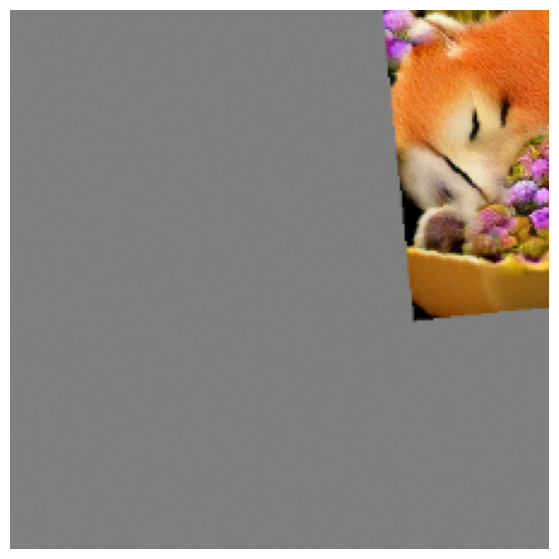

Generated Image(not cropped)


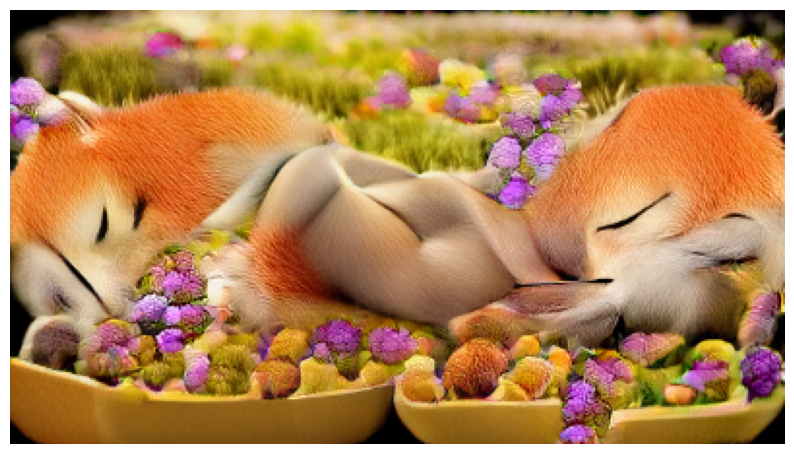

Loss:  -0.259033203125 
Iterations:  499
Augumented Crop Image


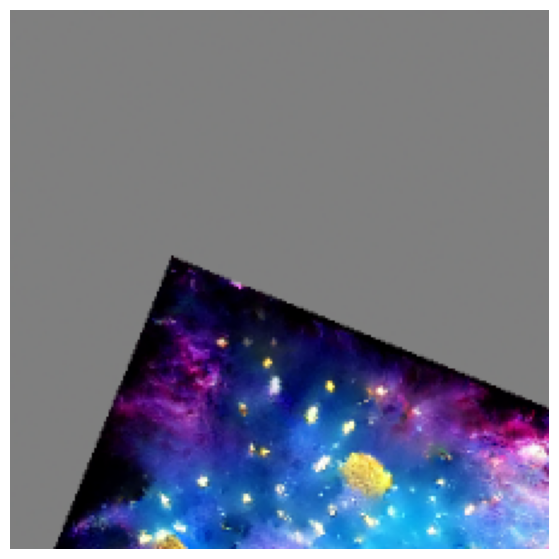

Generated Image(not cropped)


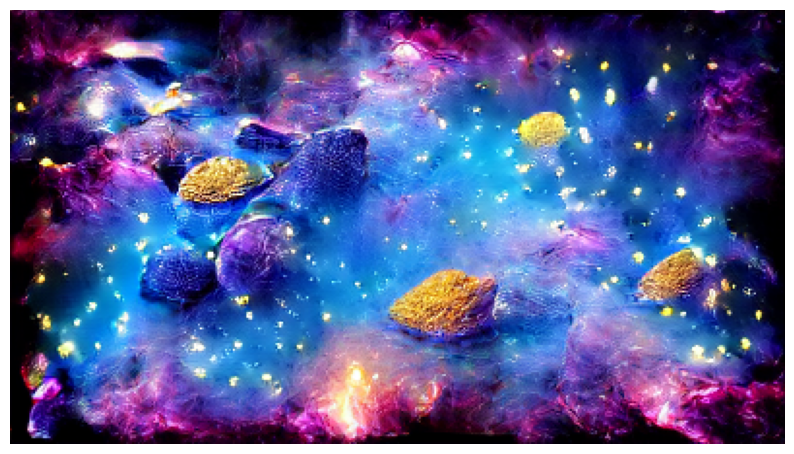

Loss:  -0.2213134765625 
Iterations:  499


In [ ]:
torch.cuda.empty_cache()
w1=1
w2=1
include=['A cute baby fox sleeping in a bed of flowers, ultra detailed, adorable, soft lighting, warm colors','beautiful starry night sky, colorful nebula, vibrant, dreamy']
exclude='scary, distorted, ugly'
extra = ""
include_enc,exclude_enc,extra_enc=createEncoding(include,exclude,extra)
res_img,res_z=Training_loop(show_crop=True)

In [ ]:
print(len(res_img),len(res_z))   #No of prompts
print(res_img[0].shape,res_z[0].shape)   #Shape
print(res_z[0].min(),res_z[0].max())

2 2
torch.Size([3, 224, 400]) torch.Size([1, 256, 14, 25])
tensor(-5.8960, device='cuda:0', grad_fn=<MinBackward1>) tensor(6.1216, device='cuda:0', grad_fn=<MaxBackward1>)


##Interpolation and Creating Video

In [ ]:
def interpolate(res_z_list,duration_list):
  gen_img_list=[]
  fps=25
  for idx,(z,duration) in enumerate(zip(res_z_list,duration_list)):
    num_steps=int(fps*duration)
    z1=z   #1*256*14*25
    z2=res_z_list[(idx+1)%len(res_z_list)]
    for step in range(num_steps):
      alpha=math.sin(1.5*step/num_steps)**6   #sin and exponential(6) intepolation helps to display more item in the middle and less at end
      z_new=alpha*z2 + (1-alpha)*z1
      new_gen=norm_data(generator(z_new).cpu())[0]   #3*224*400
      new_img=T.ToPILImage(mode='RGB')(new_gen)
      gen_img_list.append(new_img)
  return gen_img_list

duration=[3,3,3,3]
interpolate_result_img_list=interpolate(res_z,duration)

In [ ]:
import numpy as np
out_vid_path=f"../res1.mp4"
writer=imageio.get_writer(out_vid_path,fps=25)
for pil_img in interpolate_result_img_list:
  img=np.array(pil_img,dtype=np.uint8)
  writer.append_data(img)
writer.close()

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4=open('../res1.mp4','rb').read()
data="data:video/mp4;base64,"+b64encode(mp4).decode()
HTML("""<video width=800 controls><source src="%s" type="video/mp4"></video>""" % data)